# Reading and Basic Plotting

### Example of Reading

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
pd.read_csv? # get info on method


SyntaxError: invalid syntax (<ipython-input-6-3efe5c5d9bb7>, line 1)

In [10]:
df = pd.read_csv('data/btc-market-price.csv')
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


In [20]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [11]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.head()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


In [12]:
df.columns = ['Timestamp', 'Price']
df.shape

(365, 2)

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']); df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [21]:
df.set_index('Timestamp', inplace=True) # set index to time for quick processing
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Quick Version

In [22]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
); df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [23]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

### Ploting Basics

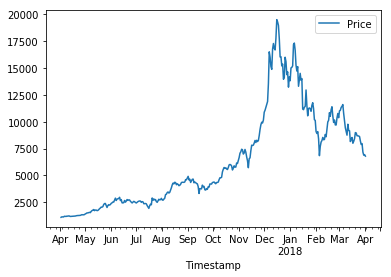

In [24]:
df.plot()

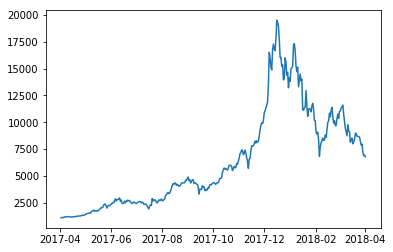

In [25]:
plt.plot(df.index, df['Price'])

Text(0.5,1,'My Nice Plot')

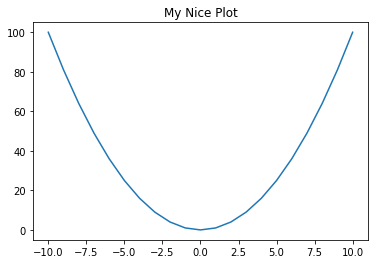

In [28]:
x = np.arange(-10, 11)
plt.plot(x, x ** 2)
plt.title('My Nice Plot')

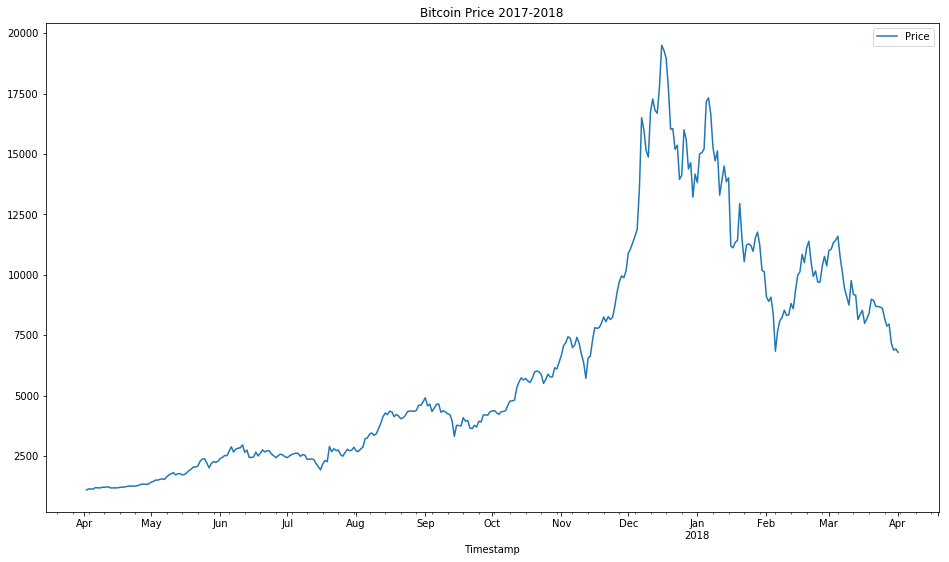

In [27]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018') # df has similar ploting to plt.

### More Challenging Parsing Example

In [31]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
eth.head()

,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


In [33]:
prices = pd.DataFrame(index=df.index)
prices['Bitcoin'] = df['Price']
prices['Ether'] = eth['Value']
prices.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


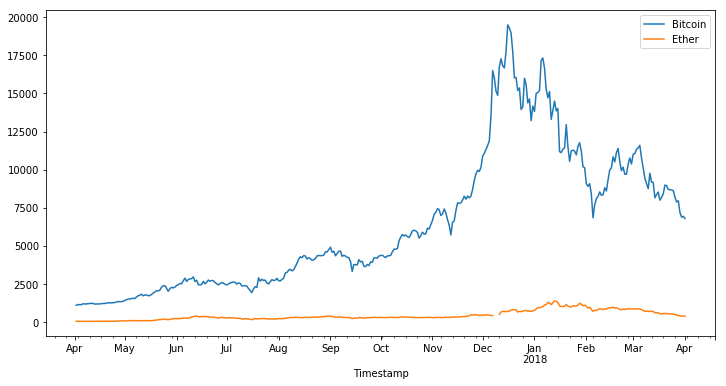

In [34]:
prices.plot(figsize=(12, 6))

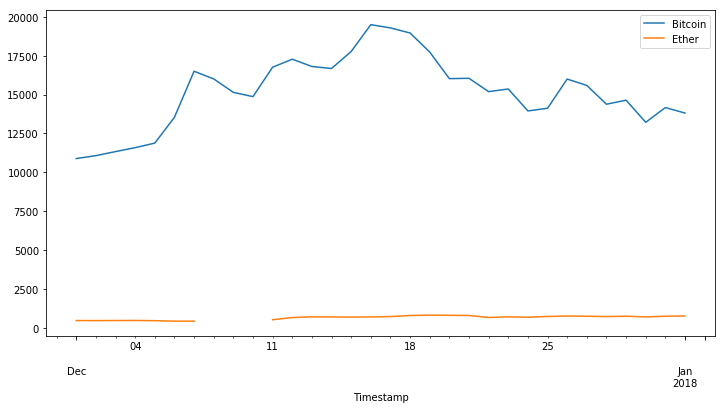

In [35]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6)) # slice